# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
!pip install matplotlib==2.2.0

    100% |████████████████████████████████| 12.5MB 60kB/s  eta 0:00:01
    100% |████████████████████████████████| 952kB 790kB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'

import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

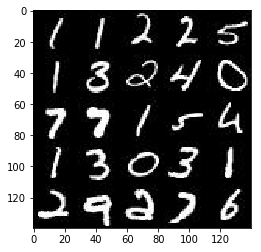

In [4]:
show_n_images = 25


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

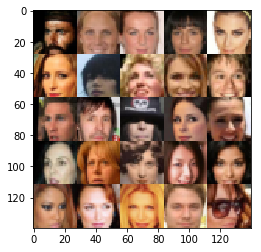

In [5]:
show_n_images = 25

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:

from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
   
    real_images =tf.placeholder(tf.float32,(None,image_width,image_height, image_channels),name = "input_real")
    z_inputs= tf.placeholder(tf.float32,(None,z_dim), name ="input_z")
    learning_rate = tf.placeholder(tf.float32 ,name ="lr")

    return real_images, z_inputs, learning_rate



tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False):
   
   

    with tf.variable_scope('discriminator', reuse=reuse):
    
        d1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        d1 = tf.maximum(0.1 * d1, d1)
        
        d2 = tf.layers.conv2d(d1, 128, 5, strides=2, padding='same', activation=None)
        d2 = tf.layers.batch_normalization(d2, training=True)
        d2 = tf.maximum(0.1 * d2, d2)
        d2 = tf.nn.dropout(d2, keep_prob=0.9)
        
        d3 = tf.layers.conv2d(d2, 256, 5, strides=2, padding='same', activation=None)
        d3 = tf.layers.batch_normalization(d3, training=True)
        d3 = tf.maximum(0.1 * d3, d3)
        d3 = tf.nn.dropout(d3, keep_prob=0.9)
        
        flat = tf.reshape(d3, (-1,  4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
        return output, logits



tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [16]:
def generator(z, out_channel_dim, is_train=True):
    
    with tf.variable_scope('generator',reuse=not is_train):
        g1 =tf.layers.dense(z,7*7*512)
        g1 = tf.reshape(g1,(-1,7,7,512))
        g1 = tf.layers.batch_normalization(g1, training =is_train)
        g1 =tf.maximum(0.1*g1,g1)
        
        
        g2 = tf.layers.conv2d_transpose(g1, 256,5, strides=2, padding='same', activation=None)
        g2 = tf.layers.batch_normalization(g2, training=is_train)
        g2 = tf.maximum(0.1*g2,g2)
        g2 = tf.nn.dropout(g2 ,keep_prob = 0.9)
        
        g3 = tf.layers.conv2d_transpose(g2, 128,5, strides=2, padding='same', activation=None)
        g3 = tf.layers.batch_normalization(g3, training=is_train)
        g3 = tf.maximum(0.1*g3,g3)
        g3 = tf.nn.dropout(g3 ,keep_prob = 0.9)
        logits = tf.layers.conv2d_transpose(g3, out_channel_dim,3, strides=1, padding='same', activation=None)        
        output =tf.tanh(logits)
    
    
        return output


tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [36]:
def model_loss(input_real, input_z, out_channel_dim):
    
    g_out = generator(input_z, out_channel_dim)
    d_out_real, d_logits_real = discriminator(input_real)
    d_out_fake, d_logits_fake = discriminator(g_out, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = d_logits_real,
            labels = tf.ones_like(d_out_real) * (0.9)
        )
    )
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = d_logits_fake,
            labels = tf.zeros_like(d_out_fake)
        )
    )
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = d_logits_fake,
            labels = tf.ones_like(d_out_fake)
        )
    )
    
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


tests.test_model_loss(model_loss)


Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [37]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    
    train_vars = tf.trainable_variables()
    
    d_vars =[var for var in train_vars if var.name.startswith('discriminator')]
    
    g_vars =[var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    with tf.control_dependencies(update_ops):
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

        return disc_train_opt, gen_train_opt
    
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [38]:

import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [39]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)

    
    saver = tf.train.Saver()
    losses = []
    steps = 0
    total_steps = epoch_count * batch_size

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                            "Generator Loss: {:.4f}".format(train_loss_g),
                            "Discriminator Loss: {:.4f}...".format(train_loss_d))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')
                
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


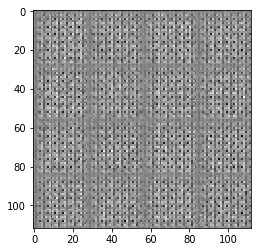

Epoch 1/2... Generator Loss: 3.4656 Discriminator Loss: 0.4093...
Epoch 1/2... Generator Loss: 4.0866 Discriminator Loss: 0.3845...
Epoch 1/2... Generator Loss: 1.1000 Discriminator Loss: 1.0472...
Epoch 1/2... Generator Loss: 6.1538 Discriminator Loss: 0.3966...
Epoch 1/2... Generator Loss: 1.0986 Discriminator Loss: 1.0910...
Epoch 1/2... Generator Loss: 1.1228 Discriminator Loss: 1.1213...
Epoch 1/2... Generator Loss: 1.2529 Discriminator Loss: 0.9742...
Epoch 1/2... Generator Loss: 1.2845 Discriminator Loss: 1.1065...
Epoch 1/2... Generator Loss: 1.0118 Discriminator Loss: 1.1839...
Epoch 1/2... Generator Loss: 1.3573 Discriminator Loss: 1.1438...


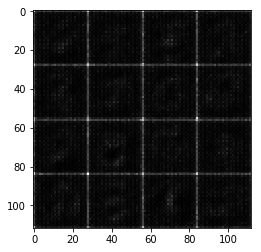

Epoch 1/2... Generator Loss: 1.4521 Discriminator Loss: 1.2591...
Epoch 1/2... Generator Loss: 0.7106 Discriminator Loss: 1.2948...
Epoch 1/2... Generator Loss: 0.9144 Discriminator Loss: 1.1638...
Epoch 1/2... Generator Loss: 1.0564 Discriminator Loss: 1.2251...
Epoch 1/2... Generator Loss: 0.7067 Discriminator Loss: 1.2319...
Epoch 1/2... Generator Loss: 1.3302 Discriminator Loss: 1.0547...
Epoch 1/2... Generator Loss: 1.5287 Discriminator Loss: 0.9765...
Epoch 1/2... Generator Loss: 1.4882 Discriminator Loss: 1.0686...
Epoch 1/2... Generator Loss: 1.9110 Discriminator Loss: 1.0348...
Epoch 1/2... Generator Loss: 0.7532 Discriminator Loss: 1.1047...


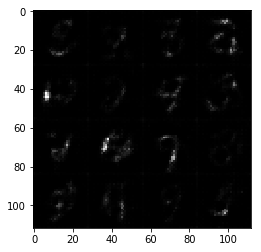

Epoch 1/2... Generator Loss: 0.8056 Discriminator Loss: 1.1543...
Epoch 1/2... Generator Loss: 1.0965 Discriminator Loss: 0.9781...
Epoch 1/2... Generator Loss: 1.1166 Discriminator Loss: 0.9430...
Epoch 1/2... Generator Loss: 1.6626 Discriminator Loss: 0.9676...
Epoch 1/2... Generator Loss: 1.9602 Discriminator Loss: 1.0392...
Epoch 1/2... Generator Loss: 1.5495 Discriminator Loss: 0.8874...
Epoch 1/2... Generator Loss: 0.8678 Discriminator Loss: 1.0974...
Epoch 1/2... Generator Loss: 0.6399 Discriminator Loss: 1.2592...
Epoch 1/2... Generator Loss: 1.9728 Discriminator Loss: 0.9766...
Epoch 1/2... Generator Loss: 1.2662 Discriminator Loss: 0.9366...


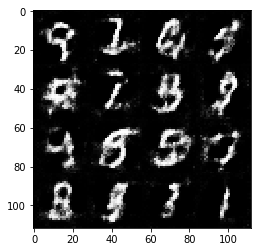

Epoch 1/2... Generator Loss: 1.8027 Discriminator Loss: 1.1932...
Epoch 1/2... Generator Loss: 0.8986 Discriminator Loss: 1.0129...
Epoch 1/2... Generator Loss: 0.9038 Discriminator Loss: 1.0826...
Epoch 1/2... Generator Loss: 0.8582 Discriminator Loss: 1.1031...
Epoch 1/2... Generator Loss: 1.1476 Discriminator Loss: 1.0097...
Epoch 1/2... Generator Loss: 2.1068 Discriminator Loss: 1.2255...
Epoch 1/2... Generator Loss: 1.3086 Discriminator Loss: 1.0597...
Epoch 1/2... Generator Loss: 0.7204 Discriminator Loss: 1.2317...
Epoch 1/2... Generator Loss: 1.3496 Discriminator Loss: 1.0922...
Epoch 1/2... Generator Loss: 0.5564 Discriminator Loss: 1.3290...


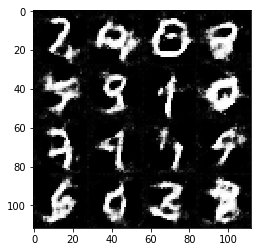

Epoch 1/2... Generator Loss: 0.7821 Discriminator Loss: 1.1392...
Epoch 1/2... Generator Loss: 0.8261 Discriminator Loss: 1.1502...
Epoch 1/2... Generator Loss: 1.2665 Discriminator Loss: 1.0234...
Epoch 1/2... Generator Loss: 1.6937 Discriminator Loss: 1.0882...
Epoch 1/2... Generator Loss: 1.0361 Discriminator Loss: 1.0609...
Epoch 1/2... Generator Loss: 1.1381 Discriminator Loss: 1.0772...
Epoch 2/2... Generator Loss: 0.4586 Discriminator Loss: 1.5072...
Epoch 2/2... Generator Loss: 1.3072 Discriminator Loss: 1.0730...
Epoch 2/2... Generator Loss: 1.6665 Discriminator Loss: 1.0587...
Epoch 2/2... Generator Loss: 0.7974 Discriminator Loss: 1.2013...


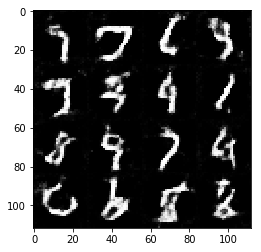

Epoch 2/2... Generator Loss: 1.6293 Discriminator Loss: 1.0625...
Epoch 2/2... Generator Loss: 0.9942 Discriminator Loss: 1.0681...
Epoch 2/2... Generator Loss: 0.9526 Discriminator Loss: 1.1120...
Epoch 2/2... Generator Loss: 0.9881 Discriminator Loss: 1.0821...
Epoch 2/2... Generator Loss: 1.9981 Discriminator Loss: 1.1118...
Epoch 2/2... Generator Loss: 0.9477 Discriminator Loss: 1.1364...
Epoch 2/2... Generator Loss: 1.2085 Discriminator Loss: 1.0285...
Epoch 2/2... Generator Loss: 1.5013 Discriminator Loss: 1.0663...
Epoch 2/2... Generator Loss: 0.7939 Discriminator Loss: 1.1806...
Epoch 2/2... Generator Loss: 1.1368 Discriminator Loss: 1.0342...


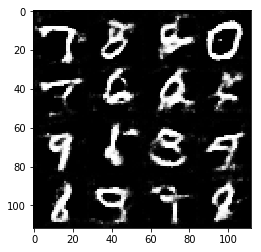

Epoch 2/2... Generator Loss: 0.7878 Discriminator Loss: 1.1516...
Epoch 2/2... Generator Loss: 1.7286 Discriminator Loss: 1.0493...
Epoch 2/2... Generator Loss: 0.5544 Discriminator Loss: 1.4446...
Epoch 2/2... Generator Loss: 1.0215 Discriminator Loss: 1.0343...
Epoch 2/2... Generator Loss: 1.8356 Discriminator Loss: 1.1739...
Epoch 2/2... Generator Loss: 1.0063 Discriminator Loss: 1.0707...
Epoch 2/2... Generator Loss: 1.3182 Discriminator Loss: 1.0384...
Epoch 2/2... Generator Loss: 0.8956 Discriminator Loss: 1.1785...
Epoch 2/2... Generator Loss: 0.8348 Discriminator Loss: 1.0913...
Epoch 2/2... Generator Loss: 1.3733 Discriminator Loss: 1.0374...


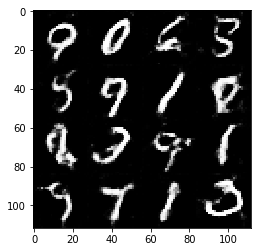

Epoch 2/2... Generator Loss: 1.0620 Discriminator Loss: 1.0399...
Epoch 2/2... Generator Loss: 2.0192 Discriminator Loss: 1.1876...
Epoch 2/2... Generator Loss: 1.1973 Discriminator Loss: 1.0086...
Epoch 2/2... Generator Loss: 0.7546 Discriminator Loss: 1.1453...
Epoch 2/2... Generator Loss: 1.4259 Discriminator Loss: 1.0303...
Epoch 2/2... Generator Loss: 0.7791 Discriminator Loss: 1.1591...
Epoch 2/2... Generator Loss: 0.8919 Discriminator Loss: 1.0597...
Epoch 2/2... Generator Loss: 1.5544 Discriminator Loss: 0.9701...
Epoch 2/2... Generator Loss: 1.0066 Discriminator Loss: 1.0138...
Epoch 2/2... Generator Loss: 1.0072 Discriminator Loss: 0.9974...


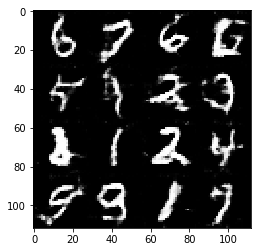

Epoch 2/2... Generator Loss: 1.9829 Discriminator Loss: 1.1257...
Epoch 2/2... Generator Loss: 1.3945 Discriminator Loss: 0.9668...
Epoch 2/2... Generator Loss: 1.0856 Discriminator Loss: 1.0859...
Epoch 2/2... Generator Loss: 1.3692 Discriminator Loss: 0.9420...
Epoch 2/2... Generator Loss: 1.0710 Discriminator Loss: 1.0486...
Epoch 2/2... Generator Loss: 1.1624 Discriminator Loss: 1.1625...
Epoch 2/2... Generator Loss: 1.1364 Discriminator Loss: 1.0035...
Epoch 2/2... Generator Loss: 1.3187 Discriminator Loss: 1.0257...
Epoch 2/2... Generator Loss: 1.2916 Discriminator Loss: 1.0192...
Epoch 2/2... Generator Loss: 1.7332 Discriminator Loss: 1.0869...


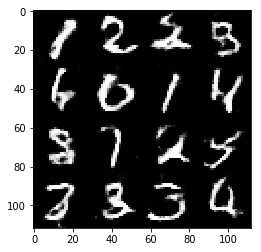

Epoch 2/2... Generator Loss: 1.5392 Discriminator Loss: 1.0052...
Epoch 2/2... Generator Loss: 1.6268 Discriminator Loss: 1.1169...
Epoch 2/2... Generator Loss: 0.9129 Discriminator Loss: 1.0740...


In [40]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


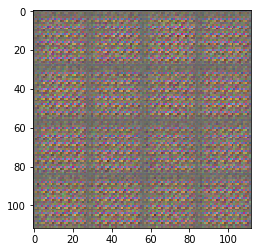

Epoch 1/1... Generator Loss: 3.7902 Discriminator Loss: 0.4418...
Epoch 1/1... Generator Loss: 3.6212 Discriminator Loss: 0.4084...
Epoch 1/1... Generator Loss: 3.3031 Discriminator Loss: 0.4547...
Epoch 1/1... Generator Loss: 4.4816 Discriminator Loss: 0.4895...
Epoch 1/1... Generator Loss: 1.8551 Discriminator Loss: 0.6941...
Epoch 1/1... Generator Loss: 2.3578 Discriminator Loss: 0.6085...
Epoch 1/1... Generator Loss: 3.2326 Discriminator Loss: 0.6142...
Epoch 1/1... Generator Loss: 2.4370 Discriminator Loss: 0.5724...
Epoch 1/1... Generator Loss: 5.3381 Discriminator Loss: 0.7260...
Epoch 1/1... Generator Loss: 3.0968 Discriminator Loss: 0.4872...


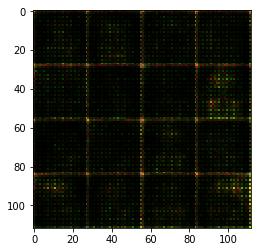

Epoch 1/1... Generator Loss: 2.6016 Discriminator Loss: 0.5186...
Epoch 1/1... Generator Loss: 2.6234 Discriminator Loss: 0.5287...
Epoch 1/1... Generator Loss: 7.4540 Discriminator Loss: 2.1890...
Epoch 1/1... Generator Loss: 2.2064 Discriminator Loss: 0.5196...
Epoch 1/1... Generator Loss: 4.0918 Discriminator Loss: 1.0228...
Epoch 1/1... Generator Loss: 2.3240 Discriminator Loss: 0.6878...
Epoch 1/1... Generator Loss: 2.2586 Discriminator Loss: 0.6187...
Epoch 1/1... Generator Loss: 3.5028 Discriminator Loss: 1.3776...
Epoch 1/1... Generator Loss: 1.5749 Discriminator Loss: 0.9849...
Epoch 1/1... Generator Loss: 0.7131 Discriminator Loss: 1.3783...


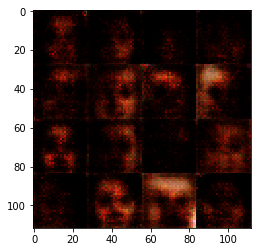

Epoch 1/1... Generator Loss: 2.2906 Discriminator Loss: 1.3815...
Epoch 1/1... Generator Loss: 0.3437 Discriminator Loss: 1.8559...
Epoch 1/1... Generator Loss: 2.3235 Discriminator Loss: 1.0729...
Epoch 1/1... Generator Loss: 1.7450 Discriminator Loss: 1.0486...
Epoch 1/1... Generator Loss: 1.0140 Discriminator Loss: 1.1041...
Epoch 1/1... Generator Loss: 2.7797 Discriminator Loss: 1.0256...
Epoch 1/1... Generator Loss: 2.8889 Discriminator Loss: 1.3537...
Epoch 1/1... Generator Loss: 3.5600 Discriminator Loss: 1.3337...
Epoch 1/1... Generator Loss: 1.8556 Discriminator Loss: 0.9417...
Epoch 1/1... Generator Loss: 0.9325 Discriminator Loss: 1.4126...


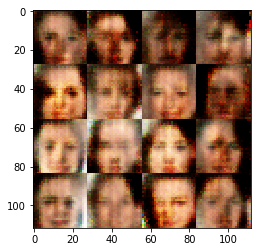

Epoch 1/1... Generator Loss: 1.4839 Discriminator Loss: 1.0738...
Epoch 1/1... Generator Loss: 1.7600 Discriminator Loss: 1.0268...
Epoch 1/1... Generator Loss: 2.7992 Discriminator Loss: 1.6979...
Epoch 1/1... Generator Loss: 1.7102 Discriminator Loss: 0.8173...
Epoch 1/1... Generator Loss: 0.2929 Discriminator Loss: 1.9278...
Epoch 1/1... Generator Loss: 1.7503 Discriminator Loss: 1.2177...
Epoch 1/1... Generator Loss: 1.3680 Discriminator Loss: 1.0851...
Epoch 1/1... Generator Loss: 1.4740 Discriminator Loss: 1.2268...
Epoch 1/1... Generator Loss: 1.1405 Discriminator Loss: 1.0892...
Epoch 1/1... Generator Loss: 0.5963 Discriminator Loss: 1.4797...


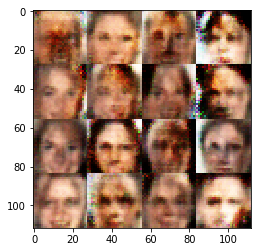

Epoch 1/1... Generator Loss: 1.5439 Discriminator Loss: 1.0493...
Epoch 1/1... Generator Loss: 1.4996 Discriminator Loss: 0.9061...
Epoch 1/1... Generator Loss: 1.3048 Discriminator Loss: 1.0798...
Epoch 1/1... Generator Loss: 0.6024 Discriminator Loss: 1.2846...
Epoch 1/1... Generator Loss: 0.8675 Discriminator Loss: 1.1949...
Epoch 1/1... Generator Loss: 1.5966 Discriminator Loss: 1.0294...
Epoch 1/1... Generator Loss: 0.7519 Discriminator Loss: 1.2875...
Epoch 1/1... Generator Loss: 0.7659 Discriminator Loss: 1.1775...
Epoch 1/1... Generator Loss: 1.3221 Discriminator Loss: 1.0209...
Epoch 1/1... Generator Loss: 0.5858 Discriminator Loss: 1.3086...


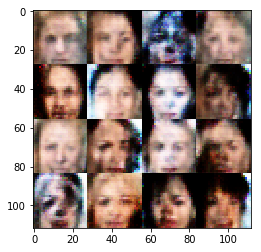

Epoch 1/1... Generator Loss: 0.4594 Discriminator Loss: 1.5771...
Epoch 1/1... Generator Loss: 0.6699 Discriminator Loss: 1.2583...
Epoch 1/1... Generator Loss: 1.2208 Discriminator Loss: 1.2264...
Epoch 1/1... Generator Loss: 0.5080 Discriminator Loss: 1.4479...
Epoch 1/1... Generator Loss: 2.1025 Discriminator Loss: 1.2625...
Epoch 1/1... Generator Loss: 1.4712 Discriminator Loss: 0.8592...
Epoch 1/1... Generator Loss: 1.1720 Discriminator Loss: 1.0226...
Epoch 1/1... Generator Loss: 1.1614 Discriminator Loss: 1.0213...
Epoch 1/1... Generator Loss: 0.9015 Discriminator Loss: 1.1563...
Epoch 1/1... Generator Loss: 1.1634 Discriminator Loss: 1.1053...


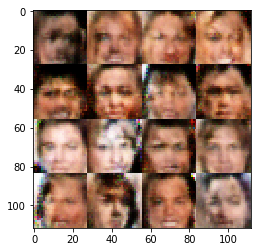

Epoch 1/1... Generator Loss: 1.3328 Discriminator Loss: 1.4521...
Epoch 1/1... Generator Loss: 2.8289 Discriminator Loss: 1.5746...
Epoch 1/1... Generator Loss: 0.7174 Discriminator Loss: 1.3407...
Epoch 1/1... Generator Loss: 0.8970 Discriminator Loss: 1.1862...
Epoch 1/1... Generator Loss: 2.5032 Discriminator Loss: 1.4765...
Epoch 1/1... Generator Loss: 0.5468 Discriminator Loss: 1.3785...
Epoch 1/1... Generator Loss: 1.3179 Discriminator Loss: 1.1742...
Epoch 1/1... Generator Loss: 1.0694 Discriminator Loss: 0.9929...
Epoch 1/1... Generator Loss: 0.7944 Discriminator Loss: 1.3008...
Epoch 1/1... Generator Loss: 1.7462 Discriminator Loss: 1.4311...


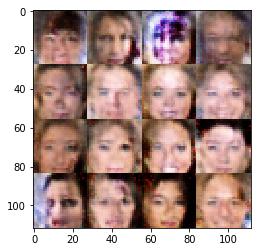

Epoch 1/1... Generator Loss: 1.1399 Discriminator Loss: 1.1079...
Epoch 1/1... Generator Loss: 1.3587 Discriminator Loss: 1.0353...
Epoch 1/1... Generator Loss: 0.4203 Discriminator Loss: 1.6260...
Epoch 1/1... Generator Loss: 0.9542 Discriminator Loss: 1.2190...
Epoch 1/1... Generator Loss: 0.7198 Discriminator Loss: 1.1980...
Epoch 1/1... Generator Loss: 1.0222 Discriminator Loss: 1.1500...
Epoch 1/1... Generator Loss: 0.9735 Discriminator Loss: 1.0951...
Epoch 1/1... Generator Loss: 1.2024 Discriminator Loss: 1.0881...
Epoch 1/1... Generator Loss: 0.6848 Discriminator Loss: 1.3853...
Epoch 1/1... Generator Loss: 1.2451 Discriminator Loss: 1.2400...


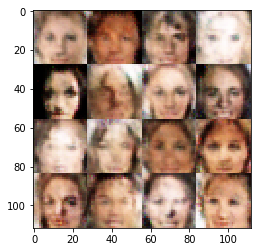

Epoch 1/1... Generator Loss: 0.8309 Discriminator Loss: 1.2466...
Epoch 1/1... Generator Loss: 0.9021 Discriminator Loss: 1.2391...
Epoch 1/1... Generator Loss: 1.0775 Discriminator Loss: 1.3453...
Epoch 1/1... Generator Loss: 0.9454 Discriminator Loss: 1.2889...
Epoch 1/1... Generator Loss: 1.4333 Discriminator Loss: 1.3410...
Epoch 1/1... Generator Loss: 1.1556 Discriminator Loss: 1.0363...
Epoch 1/1... Generator Loss: 0.6320 Discriminator Loss: 1.3882...
Epoch 1/1... Generator Loss: 0.8039 Discriminator Loss: 1.3238...
Epoch 1/1... Generator Loss: 0.8918 Discriminator Loss: 1.1448...
Epoch 1/1... Generator Loss: 0.6644 Discriminator Loss: 1.2222...


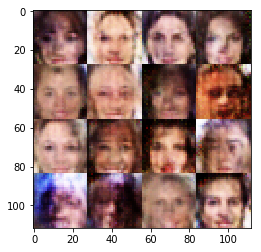

Epoch 1/1... Generator Loss: 1.0602 Discriminator Loss: 1.2179...
Epoch 1/1... Generator Loss: 1.2003 Discriminator Loss: 1.1689...
Epoch 1/1... Generator Loss: 0.6984 Discriminator Loss: 1.3693...
Epoch 1/1... Generator Loss: 0.8571 Discriminator Loss: 1.3433...
Epoch 1/1... Generator Loss: 0.3668 Discriminator Loss: 1.7490...
Epoch 1/1... Generator Loss: 0.9177 Discriminator Loss: 1.2083...
Epoch 1/1... Generator Loss: 1.2206 Discriminator Loss: 1.5161...
Epoch 1/1... Generator Loss: 0.9165 Discriminator Loss: 1.1984...
Epoch 1/1... Generator Loss: 0.7389 Discriminator Loss: 1.1753...
Epoch 1/1... Generator Loss: 0.8012 Discriminator Loss: 1.2574...


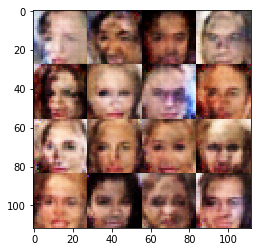

Epoch 1/1... Generator Loss: 1.0624 Discriminator Loss: 1.2382...
Epoch 1/1... Generator Loss: 1.2295 Discriminator Loss: 1.0593...
Epoch 1/1... Generator Loss: 1.0041 Discriminator Loss: 1.2450...
Epoch 1/1... Generator Loss: 0.4946 Discriminator Loss: 1.4614...
Epoch 1/1... Generator Loss: 1.4077 Discriminator Loss: 1.1644...
Epoch 1/1... Generator Loss: 0.6837 Discriminator Loss: 1.3283...
Epoch 1/1... Generator Loss: 1.2635 Discriminator Loss: 1.1575...
Epoch 1/1... Generator Loss: 0.8270 Discriminator Loss: 1.4177...
Epoch 1/1... Generator Loss: 0.7823 Discriminator Loss: 1.2875...
Epoch 1/1... Generator Loss: 0.8658 Discriminator Loss: 1.3721...


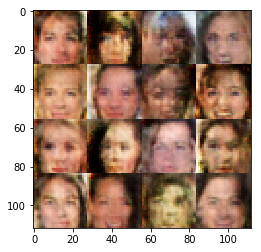

Epoch 1/1... Generator Loss: 1.5110 Discriminator Loss: 1.4335...
Epoch 1/1... Generator Loss: 0.8220 Discriminator Loss: 1.4145...
Epoch 1/1... Generator Loss: 0.9170 Discriminator Loss: 1.3204...
Epoch 1/1... Generator Loss: 0.8929 Discriminator Loss: 1.4044...
Epoch 1/1... Generator Loss: 0.7705 Discriminator Loss: 1.4906...
Epoch 1/1... Generator Loss: 0.5673 Discriminator Loss: 1.4247...
Epoch 1/1... Generator Loss: 1.0186 Discriminator Loss: 1.2339...
Epoch 1/1... Generator Loss: 0.4804 Discriminator Loss: 1.5366...
Epoch 1/1... Generator Loss: 0.8291 Discriminator Loss: 1.2573...
Epoch 1/1... Generator Loss: 0.8157 Discriminator Loss: 1.3247...


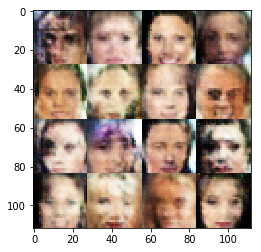

Epoch 1/1... Generator Loss: 1.1586 Discriminator Loss: 1.2778...
Epoch 1/1... Generator Loss: 0.8416 Discriminator Loss: 1.3090...
Epoch 1/1... Generator Loss: 0.7214 Discriminator Loss: 1.3982...
Epoch 1/1... Generator Loss: 0.6154 Discriminator Loss: 1.3738...
Epoch 1/1... Generator Loss: 0.9054 Discriminator Loss: 1.2239...
Epoch 1/1... Generator Loss: 1.2343 Discriminator Loss: 1.2645...
Epoch 1/1... Generator Loss: 1.1512 Discriminator Loss: 1.2398...
Epoch 1/1... Generator Loss: 0.9554 Discriminator Loss: 1.3241...
Epoch 1/1... Generator Loss: 0.8227 Discriminator Loss: 1.1620...
Epoch 1/1... Generator Loss: 0.7510 Discriminator Loss: 1.4253...


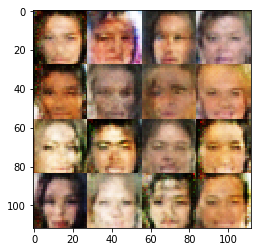

Epoch 1/1... Generator Loss: 0.9304 Discriminator Loss: 1.4920...
Epoch 1/1... Generator Loss: 1.0067 Discriminator Loss: 1.2966...
Epoch 1/1... Generator Loss: 0.8052 Discriminator Loss: 1.3236...
Epoch 1/1... Generator Loss: 0.7038 Discriminator Loss: 1.3140...
Epoch 1/1... Generator Loss: 1.1083 Discriminator Loss: 1.3634...
Epoch 1/1... Generator Loss: 1.0179 Discriminator Loss: 1.3551...
Epoch 1/1... Generator Loss: 0.8793 Discriminator Loss: 1.4807...
Epoch 1/1... Generator Loss: 0.6109 Discriminator Loss: 1.4066...
Epoch 1/1... Generator Loss: 0.5921 Discriminator Loss: 1.3773...
Epoch 1/1... Generator Loss: 0.4539 Discriminator Loss: 1.5562...


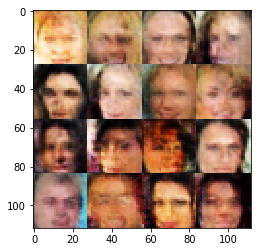

Epoch 1/1... Generator Loss: 0.8421 Discriminator Loss: 1.5241...
Epoch 1/1... Generator Loss: 0.6330 Discriminator Loss: 1.3578...
Epoch 1/1... Generator Loss: 0.6857 Discriminator Loss: 1.3347...
Epoch 1/1... Generator Loss: 0.7534 Discriminator Loss: 1.3010...
Epoch 1/1... Generator Loss: 0.9162 Discriminator Loss: 1.4413...
Epoch 1/1... Generator Loss: 0.6938 Discriminator Loss: 1.3578...
Epoch 1/1... Generator Loss: 0.6194 Discriminator Loss: 1.5526...
Epoch 1/1... Generator Loss: 0.7494 Discriminator Loss: 1.4606...
Epoch 1/1... Generator Loss: 0.6635 Discriminator Loss: 1.4489...
Epoch 1/1... Generator Loss: 1.0595 Discriminator Loss: 1.2563...


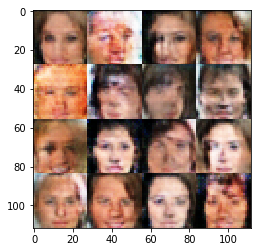

Epoch 1/1... Generator Loss: 0.7940 Discriminator Loss: 1.4157...
Epoch 1/1... Generator Loss: 0.7215 Discriminator Loss: 1.3319...
Epoch 1/1... Generator Loss: 0.7121 Discriminator Loss: 1.2509...
Epoch 1/1... Generator Loss: 0.5886 Discriminator Loss: 1.5509...
Epoch 1/1... Generator Loss: 0.8542 Discriminator Loss: 1.2528...
Epoch 1/1... Generator Loss: 0.8743 Discriminator Loss: 1.1788...
Epoch 1/1... Generator Loss: 0.6466 Discriminator Loss: 1.2625...
Epoch 1/1... Generator Loss: 1.0246 Discriminator Loss: 1.2176...
Epoch 1/1... Generator Loss: 0.8158 Discriminator Loss: 1.3063...
Epoch 1/1... Generator Loss: 1.0362 Discriminator Loss: 1.2399...


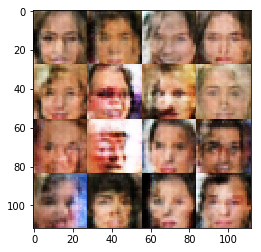

Epoch 1/1... Generator Loss: 0.8157 Discriminator Loss: 1.3229...
Epoch 1/1... Generator Loss: 0.8721 Discriminator Loss: 1.2557...
Epoch 1/1... Generator Loss: 0.8139 Discriminator Loss: 1.4370...
Epoch 1/1... Generator Loss: 0.7636 Discriminator Loss: 1.1896...
Epoch 1/1... Generator Loss: 0.7621 Discriminator Loss: 1.4311...
Epoch 1/1... Generator Loss: 1.0180 Discriminator Loss: 1.5381...
Epoch 1/1... Generator Loss: 0.8974 Discriminator Loss: 1.3722...
Epoch 1/1... Generator Loss: 0.7686 Discriminator Loss: 1.2038...
Epoch 1/1... Generator Loss: 0.7125 Discriminator Loss: 1.3366...
Epoch 1/1... Generator Loss: 0.8775 Discriminator Loss: 1.2147...


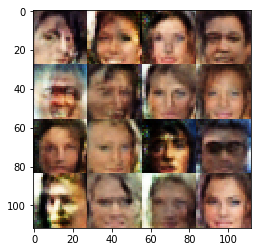

Epoch 1/1... Generator Loss: 0.6921 Discriminator Loss: 1.3627...
Epoch 1/1... Generator Loss: 0.6266 Discriminator Loss: 1.3992...
Epoch 1/1... Generator Loss: 0.7527 Discriminator Loss: 1.2707...
Epoch 1/1... Generator Loss: 0.6641 Discriminator Loss: 1.3446...
Epoch 1/1... Generator Loss: 1.0011 Discriminator Loss: 1.2927...
Epoch 1/1... Generator Loss: 0.9233 Discriminator Loss: 1.2239...
Epoch 1/1... Generator Loss: 1.0376 Discriminator Loss: 1.4668...
Epoch 1/1... Generator Loss: 0.7565 Discriminator Loss: 1.3025...
Epoch 1/1... Generator Loss: 0.6911 Discriminator Loss: 1.3004...
Epoch 1/1... Generator Loss: 0.8767 Discriminator Loss: 1.2543...


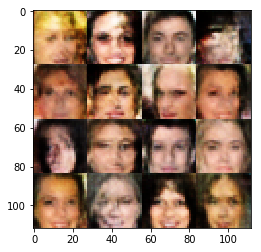

Epoch 1/1... Generator Loss: 0.7092 Discriminator Loss: 1.3351...
Epoch 1/1... Generator Loss: 1.1685 Discriminator Loss: 1.2976...
Epoch 1/1... Generator Loss: 0.7671 Discriminator Loss: 1.3286...
Epoch 1/1... Generator Loss: 0.9496 Discriminator Loss: 1.2483...
Epoch 1/1... Generator Loss: 0.8470 Discriminator Loss: 1.1921...
Epoch 1/1... Generator Loss: 0.7362 Discriminator Loss: 1.2499...
Epoch 1/1... Generator Loss: 0.6056 Discriminator Loss: 1.3707...
Epoch 1/1... Generator Loss: 0.8830 Discriminator Loss: 1.2344...
Epoch 1/1... Generator Loss: 0.8535 Discriminator Loss: 1.1520...
Epoch 1/1... Generator Loss: 0.7780 Discriminator Loss: 1.3086...


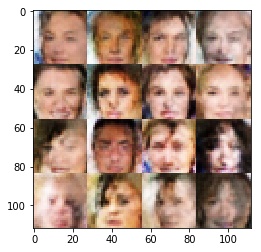

Epoch 1/1... Generator Loss: 1.1376 Discriminator Loss: 1.1931...
Epoch 1/1... Generator Loss: 0.7210 Discriminator Loss: 1.3324...
Epoch 1/1... Generator Loss: 0.6206 Discriminator Loss: 1.4107...
Epoch 1/1... Generator Loss: 0.8664 Discriminator Loss: 1.2493...
Epoch 1/1... Generator Loss: 0.6486 Discriminator Loss: 1.3463...
Epoch 1/1... Generator Loss: 1.0377 Discriminator Loss: 1.3710...
Epoch 1/1... Generator Loss: 1.1278 Discriminator Loss: 1.2369...
Epoch 1/1... Generator Loss: 0.8427 Discriminator Loss: 1.2131...
Epoch 1/1... Generator Loss: 0.9327 Discriminator Loss: 1.3113...
Epoch 1/1... Generator Loss: 0.6992 Discriminator Loss: 1.4394...


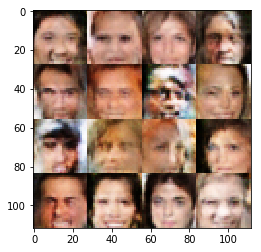

Epoch 1/1... Generator Loss: 0.7324 Discriminator Loss: 1.4882...
Epoch 1/1... Generator Loss: 0.7898 Discriminator Loss: 1.2966...
Epoch 1/1... Generator Loss: 0.7082 Discriminator Loss: 1.2624...
Epoch 1/1... Generator Loss: 0.6752 Discriminator Loss: 1.3855...
Epoch 1/1... Generator Loss: 1.0312 Discriminator Loss: 1.1805...
Epoch 1/1... Generator Loss: 0.9102 Discriminator Loss: 1.3062...
Epoch 1/1... Generator Loss: 0.9871 Discriminator Loss: 1.2250...
Epoch 1/1... Generator Loss: 0.8496 Discriminator Loss: 1.2563...
Epoch 1/1... Generator Loss: 0.8316 Discriminator Loss: 1.3665...
Epoch 1/1... Generator Loss: 0.6379 Discriminator Loss: 1.3173...


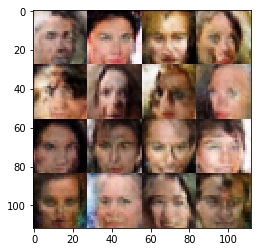

Epoch 1/1... Generator Loss: 0.8545 Discriminator Loss: 1.3022...
Epoch 1/1... Generator Loss: 0.8438 Discriminator Loss: 1.2595...
Epoch 1/1... Generator Loss: 0.7477 Discriminator Loss: 1.3307...
Epoch 1/1... Generator Loss: 0.8463 Discriminator Loss: 1.2018...
Epoch 1/1... Generator Loss: 0.8528 Discriminator Loss: 1.2915...
Epoch 1/1... Generator Loss: 0.7926 Discriminator Loss: 1.3624...
Epoch 1/1... Generator Loss: 0.8205 Discriminator Loss: 1.3432...
Epoch 1/1... Generator Loss: 0.9449 Discriminator Loss: 1.1685...
Epoch 1/1... Generator Loss: 0.6796 Discriminator Loss: 1.3490...
Epoch 1/1... Generator Loss: 0.6699 Discriminator Loss: 1.3897...


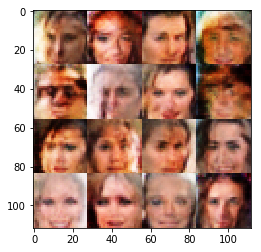

Epoch 1/1... Generator Loss: 0.7788 Discriminator Loss: 1.3424...
Epoch 1/1... Generator Loss: 0.8940 Discriminator Loss: 1.2682...
Epoch 1/1... Generator Loss: 0.7516 Discriminator Loss: 1.3005...
Epoch 1/1... Generator Loss: 0.9834 Discriminator Loss: 1.2176...
Epoch 1/1... Generator Loss: 0.8299 Discriminator Loss: 1.2275...
Epoch 1/1... Generator Loss: 0.9500 Discriminator Loss: 1.2232...
Epoch 1/1... Generator Loss: 0.5616 Discriminator Loss: 1.4100...
Epoch 1/1... Generator Loss: 0.9821 Discriminator Loss: 1.1760...
Epoch 1/1... Generator Loss: 0.8076 Discriminator Loss: 1.2841...
Epoch 1/1... Generator Loss: 0.7185 Discriminator Loss: 1.3289...


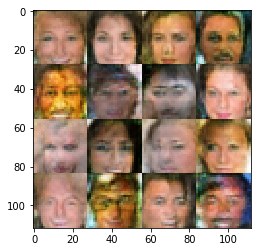

Epoch 1/1... Generator Loss: 0.7689 Discriminator Loss: 1.2168...
Epoch 1/1... Generator Loss: 0.9054 Discriminator Loss: 1.3152...
Epoch 1/1... Generator Loss: 1.0029 Discriminator Loss: 1.2402...
Epoch 1/1... Generator Loss: 0.9076 Discriminator Loss: 1.2461...
Epoch 1/1... Generator Loss: 0.8384 Discriminator Loss: 1.2263...
Epoch 1/1... Generator Loss: 0.7480 Discriminator Loss: 1.3202...
Epoch 1/1... Generator Loss: 0.7390 Discriminator Loss: 1.3441...
Epoch 1/1... Generator Loss: 0.7541 Discriminator Loss: 1.3491...
Epoch 1/1... Generator Loss: 0.7600 Discriminator Loss: 1.2996...
Epoch 1/1... Generator Loss: 0.7715 Discriminator Loss: 1.2944...


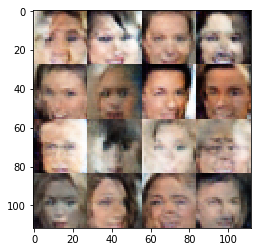

Epoch 1/1... Generator Loss: 0.7644 Discriminator Loss: 1.3855...
Epoch 1/1... Generator Loss: 0.7222 Discriminator Loss: 1.4410...
Epoch 1/1... Generator Loss: 0.7138 Discriminator Loss: 1.3910...
Epoch 1/1... Generator Loss: 0.7019 Discriminator Loss: 1.3118...
Epoch 1/1... Generator Loss: 0.9863 Discriminator Loss: 1.1801...
Epoch 1/1... Generator Loss: 1.1542 Discriminator Loss: 1.1894...
Epoch 1/1... Generator Loss: 0.9006 Discriminator Loss: 1.3110...
Epoch 1/1... Generator Loss: 0.6859 Discriminator Loss: 1.4300...
Epoch 1/1... Generator Loss: 0.6347 Discriminator Loss: 1.3838...
Epoch 1/1... Generator Loss: 1.0123 Discriminator Loss: 1.2818...


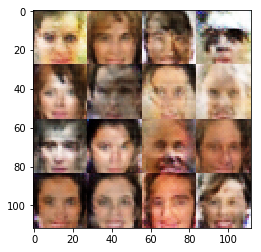

Epoch 1/1... Generator Loss: 0.7778 Discriminator Loss: 1.2926...
Epoch 1/1... Generator Loss: 1.0495 Discriminator Loss: 1.2596...
Epoch 1/1... Generator Loss: 0.9627 Discriminator Loss: 1.1528...
Epoch 1/1... Generator Loss: 0.7172 Discriminator Loss: 1.2867...
Epoch 1/1... Generator Loss: 0.6464 Discriminator Loss: 1.4061...
Epoch 1/1... Generator Loss: 0.9309 Discriminator Loss: 1.4391...
Epoch 1/1... Generator Loss: 0.5685 Discriminator Loss: 1.4263...
Epoch 1/1... Generator Loss: 0.7908 Discriminator Loss: 1.2877...
Epoch 1/1... Generator Loss: 0.6546 Discriminator Loss: 1.4204...
Epoch 1/1... Generator Loss: 0.6900 Discriminator Loss: 1.3800...


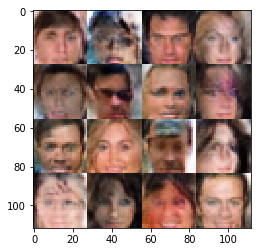

Epoch 1/1... Generator Loss: 0.7050 Discriminator Loss: 1.3064...
Epoch 1/1... Generator Loss: 0.7509 Discriminator Loss: 1.4126...
Epoch 1/1... Generator Loss: 0.6777 Discriminator Loss: 1.4409...
Epoch 1/1... Generator Loss: 0.9558 Discriminator Loss: 1.3092...
Epoch 1/1... Generator Loss: 0.9880 Discriminator Loss: 1.2817...
Epoch 1/1... Generator Loss: 0.7511 Discriminator Loss: 1.3789...
Epoch 1/1... Generator Loss: 1.0658 Discriminator Loss: 1.2658...
Epoch 1/1... Generator Loss: 0.7301 Discriminator Loss: 1.3731...
Epoch 1/1... Generator Loss: 0.6989 Discriminator Loss: 1.4744...
Epoch 1/1... Generator Loss: 0.8856 Discriminator Loss: 1.1972...


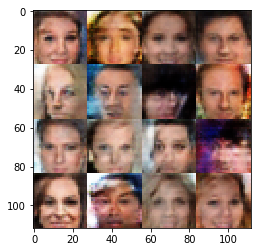

Epoch 1/1... Generator Loss: 0.7337 Discriminator Loss: 1.3070...
Epoch 1/1... Generator Loss: 0.8490 Discriminator Loss: 1.2148...
Epoch 1/1... Generator Loss: 0.7386 Discriminator Loss: 1.2749...
Epoch 1/1... Generator Loss: 0.7666 Discriminator Loss: 1.2895...
Epoch 1/1... Generator Loss: 0.7917 Discriminator Loss: 1.3208...
Epoch 1/1... Generator Loss: 0.9215 Discriminator Loss: 1.3144...
Epoch 1/1... Generator Loss: 0.6385 Discriminator Loss: 1.4273...
Epoch 1/1... Generator Loss: 0.8500 Discriminator Loss: 1.2012...
Epoch 1/1... Generator Loss: 0.7760 Discriminator Loss: 1.3331...
Epoch 1/1... Generator Loss: 0.8140 Discriminator Loss: 1.3749...


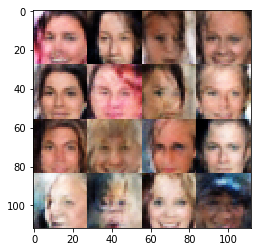

Epoch 1/1... Generator Loss: 0.7792 Discriminator Loss: 1.3662...
Epoch 1/1... Generator Loss: 0.9233 Discriminator Loss: 1.3558...
Epoch 1/1... Generator Loss: 0.6527 Discriminator Loss: 1.4594...
Epoch 1/1... Generator Loss: 1.0626 Discriminator Loss: 1.2909...
Epoch 1/1... Generator Loss: 0.7850 Discriminator Loss: 1.2579...
Epoch 1/1... Generator Loss: 0.8143 Discriminator Loss: 1.3591...
Epoch 1/1... Generator Loss: 0.8003 Discriminator Loss: 1.2844...
Epoch 1/1... Generator Loss: 0.9444 Discriminator Loss: 1.2518...
Epoch 1/1... Generator Loss: 0.6349 Discriminator Loss: 1.3860...
Epoch 1/1... Generator Loss: 0.8514 Discriminator Loss: 1.3065...


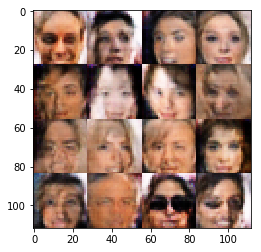

Epoch 1/1... Generator Loss: 0.8679 Discriminator Loss: 1.2649...
Epoch 1/1... Generator Loss: 0.8142 Discriminator Loss: 1.3427...
Epoch 1/1... Generator Loss: 0.6098 Discriminator Loss: 1.3905...
Epoch 1/1... Generator Loss: 0.7866 Discriminator Loss: 1.3159...
Epoch 1/1... Generator Loss: 0.8502 Discriminator Loss: 1.3057...
Epoch 1/1... Generator Loss: 0.9155 Discriminator Loss: 1.2718...
Epoch 1/1... Generator Loss: 0.5226 Discriminator Loss: 1.3989...
Epoch 1/1... Generator Loss: 0.8261 Discriminator Loss: 1.4211...
Epoch 1/1... Generator Loss: 0.6649 Discriminator Loss: 1.2976...
Epoch 1/1... Generator Loss: 0.6063 Discriminator Loss: 1.3979...


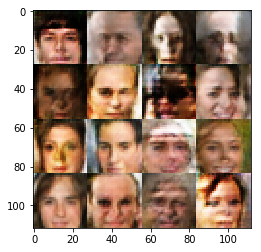

Epoch 1/1... Generator Loss: 0.9159 Discriminator Loss: 1.2210...
Epoch 1/1... Generator Loss: 0.9325 Discriminator Loss: 1.4072...
Epoch 1/1... Generator Loss: 0.8002 Discriminator Loss: 1.3665...
Epoch 1/1... Generator Loss: 0.7740 Discriminator Loss: 1.2534...
Epoch 1/1... Generator Loss: 0.7469 Discriminator Loss: 1.3449...
Epoch 1/1... Generator Loss: 0.6993 Discriminator Loss: 1.3496...
Epoch 1/1... Generator Loss: 0.8731 Discriminator Loss: 1.2572...
Epoch 1/1... Generator Loss: 0.7556 Discriminator Loss: 1.3757...
Epoch 1/1... Generator Loss: 0.8947 Discriminator Loss: 1.2122...
Epoch 1/1... Generator Loss: 1.0840 Discriminator Loss: 1.1312...


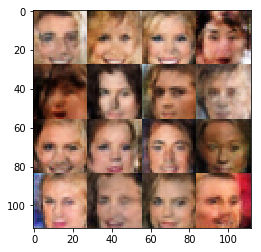

Epoch 1/1... Generator Loss: 0.7955 Discriminator Loss: 1.4317...
Epoch 1/1... Generator Loss: 0.8457 Discriminator Loss: 1.3124...
Epoch 1/1... Generator Loss: 0.9836 Discriminator Loss: 1.2842...
Epoch 1/1... Generator Loss: 0.6994 Discriminator Loss: 1.4178...
Epoch 1/1... Generator Loss: 0.7561 Discriminator Loss: 1.3452...
Epoch 1/1... Generator Loss: 0.7697 Discriminator Loss: 1.2801...


In [41]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5

epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.